#Part 2: Pneumonia Prediction Dataset (30 Pts)

##Q1: Exploratory Data Analysis (4 Pts)
Download and explore the data. Explore label distribution and qualitatively describe the data by plotting healthy and pneumonia samples. Do you see visual differences between healthy and disease samples? Do you find sources of bias that could influence model performance? How do you preprocess the data for your further analysis?

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import torch
from torchvision import datasets, transforms
import helper
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

No GPU, using /device:CPU:0.



###Storing Filedata in Array

First, we store all the image data in numpy arrays so we can work with them more easily afterwards.


In [21]:
!git clone https://github.com/hestquest/MLHC.git
#kaggle datasets download -d fedesoriano/heart-failure-prediction

fatal: destination path 'MLHC' already exists and is not an empty directory.


In [22]:
test_normal = []
test_pneumonia = []
val_normal = []
val_pneumonia = []
train_normal = []
train_pneumonia = []

# Load in the images
'''
for filepath in os.listdir('/content/MLHC/chest_xray/test/NORMAL'):
    test_normal.append(cv2.imread('chest_xray/test/NORMAL/{0}'.format(filepath),0)) #the 0 is for greyscale

for filepath in os.listdir('/content/MLHC/chest_xray/test/PNEUMONIA'):
    test_pneumonia.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('/content/MLHC/chest_xray/val/NORMAL'):
    val_normal.append(cv2.imread('chest_xray/val/NORMAL/{0}'.format(filepath),0))
    
for filepath in os.listdir('/content/MLHC/chest_xray/val/PNEUMONIA'):
    val_pneumonia.append(cv2.imread('chest_xray/val/PNEUMONIA/{0}'.format(filepath),0))

for filepath in os.listdir('/content/MLHC/chest_xray/train/NORMAL'):
    train_normal.append(cv2.imread('/content/MLHC/chest_xray/train/NORMAL/{0}'.format(filepath),0))

for filepath in os.listdir('/content/MLHC/chest_xray/train/PNEUMONIA'):
    train_pneumonia.append(cv2.imread('/content/MLHC/chest_xray/train/PNEUMONIA/{0}'.format(filepath),0))
'''

"\nfor filepath in os.listdir('/content/MLHC/chest_xray/test/NORMAL'):\n    test_normal.append(cv2.imread('chest_xray/test/NORMAL/{0}'.format(filepath),0)) #the 0 is for greyscale\n\nfor filepath in os.listdir('/content/MLHC/chest_xray/test/PNEUMONIA'):\n    test_pneumonia.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))\n    \nfor filepath in os.listdir('/content/MLHC/chest_xray/val/NORMAL'):\n    val_normal.append(cv2.imread('chest_xray/val/NORMAL/{0}'.format(filepath),0))\n    \nfor filepath in os.listdir('/content/MLHC/chest_xray/val/PNEUMONIA'):\n    val_pneumonia.append(cv2.imread('chest_xray/val/PNEUMONIA/{0}'.format(filepath),0))\n\nfor filepath in os.listdir('/content/MLHC/chest_xray/train/NORMAL'):\n    train_normal.append(cv2.imread('/content/MLHC/chest_xray/train/NORMAL/{0}'.format(filepath),0))\n\nfor filepath in os.listdir('/content/MLHC/chest_xray/train/PNEUMONIA'):\n    train_pneumonia.append(cv2.imread('/content/MLHC/chest_xray/train/PNEUMONIA/{0}



First we plot a small selection of images to check if we can see differences between the healthy samples and the samples with Pneumonia.


In [23]:
#plt.imshow(train_normal[0])



###Plotting Image Selection

First we plot a small selection of images to check if we can see differences between the healthy samples and the samples with Pneumonia.


In [24]:
train_normal_selection = []
train_pneumonia_selection = []

for i in range(4):
    train_normal_selection.append('/content/MLHC/chest_xray/train/NORMAL/{0}'.format(os.listdir('/content/MLHC/chest_xray/train/NORMAL/')[i]))
    train_pneumonia_selection.append('/content/MLHC/chest_xray/train/PNEUMONIA/{0}'.format(os.listdir('/content/MLHC/chest_xray/train/PNEUMONIA/')[i]))

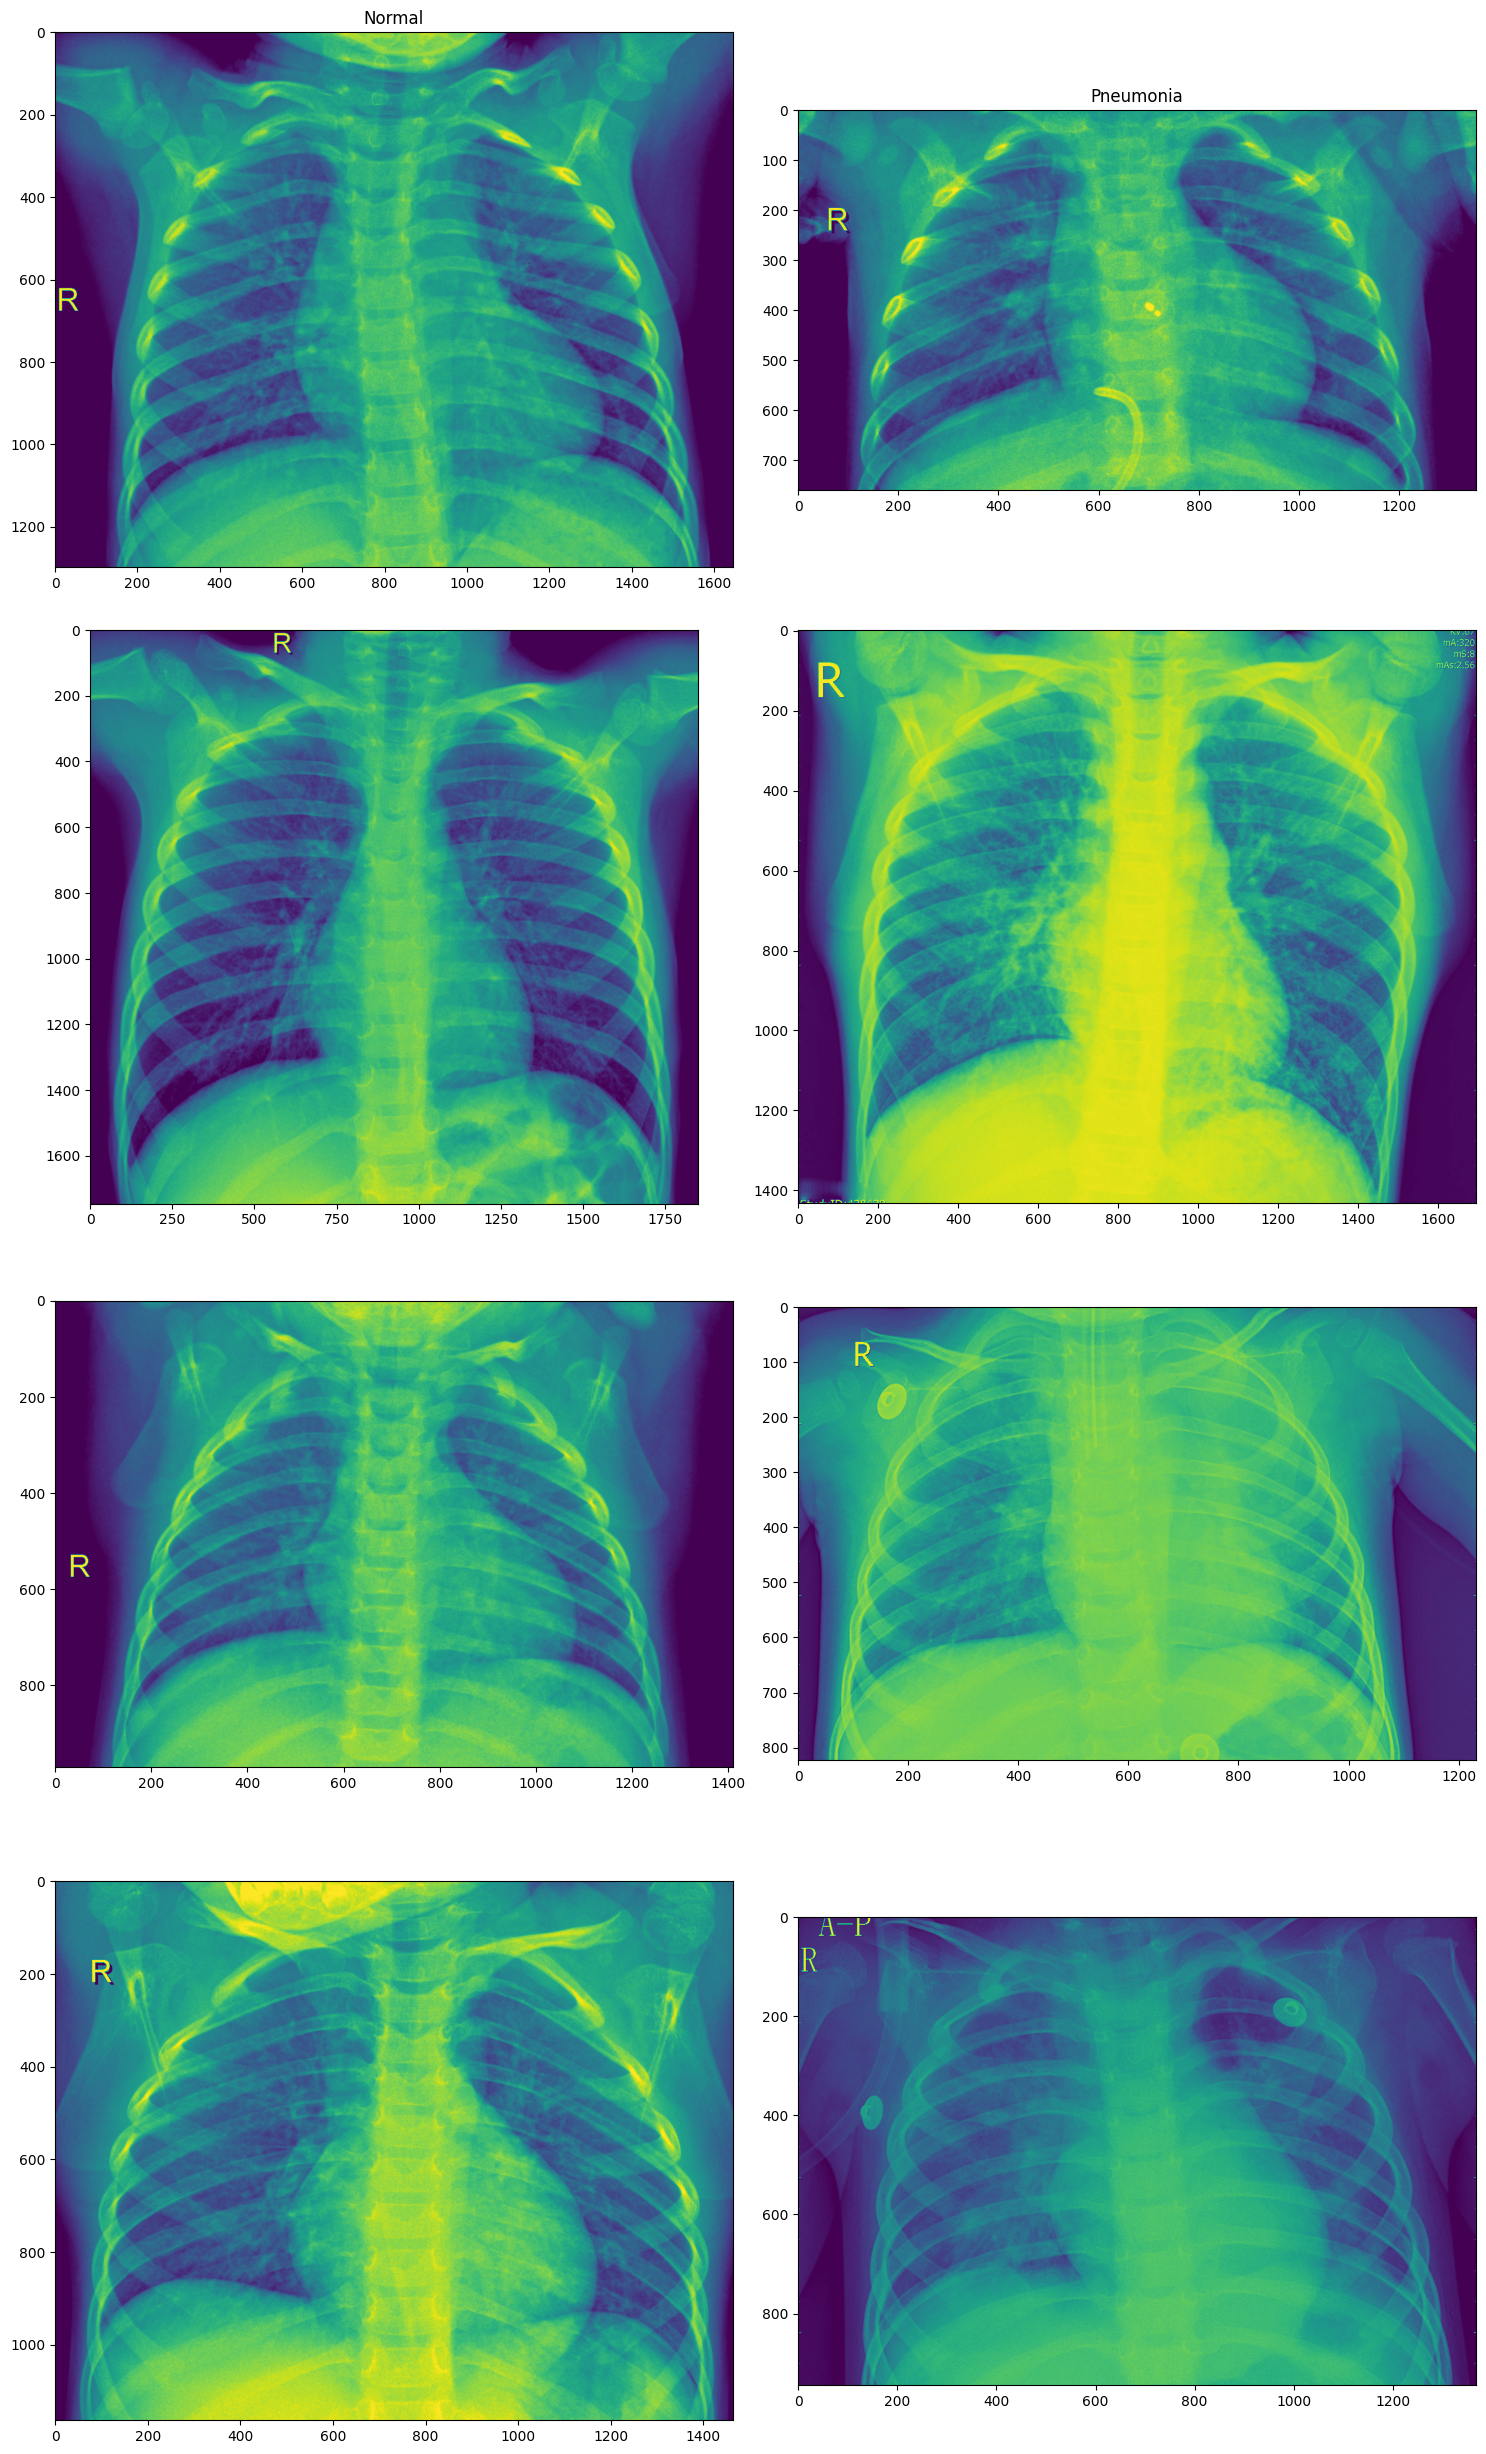

In [25]:
Cols = ['Normal', 'Pneumonia']

fig, axs = plt.subplots(4,2, figsize=(15, 25))

for i, image in enumerate(train_normal_selection):
    pic = plt.imread(image)
    axs[i,0].imshow(pic)
    axs[i,0].set()

for i, image in enumerate(train_pneumonia_selection):
    pic = plt.imread(image)
    axs[i,1].imshow(pic)
    axs[i,1].set()
    
for ax, col in zip(axs[0], Cols):
    ax.set_title(col)
    
fig.tight_layout()



When we plot the first 5 X-ray images of the training set for healthy patients (NORMAL in the left column) and patients with Pneumonia ( PNEUMONIA in the right column) we can see that the X-ray images of the patients with Pneumonia show a more cloudy texture in the area of the Lung.

We can also see that the pictures have different dimensions. That is an image property that has to be standardized before working with the images.

Another difference is the font difference of the R between pneumonia and normal images which could be sources of bias and prevent learning from the Xray images for the model. Therefore the images need to be cropped so they don't contain the R



###Plotting Label Distribution

Now we check how the labels are distributed in the dataset and if preprocessing is necessary.


Text(0.06, 0.5, 'Number of Samples')

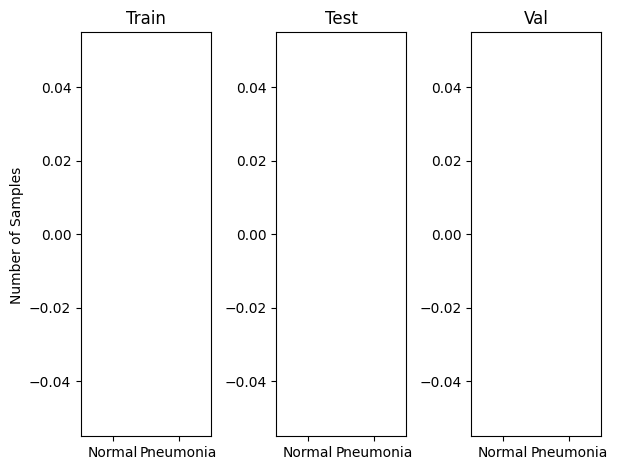

In [26]:
X = ['Normal','Pneumonia']
Train = [len(train_normal), len(train_pneumonia)]
Test = [len(test_normal), len(test_pneumonia)]
Val = [len(val_normal), len(val_pneumonia)]

fig, axs = plt.subplots(1, 3)
axs[0].bar(X, Train, color = ['tab:red', 'tab:blue'])
axs[0].set_title('Train')
axs[1].bar(X, Test, color = ['tab:red', 'tab:blue'])
axs[1].set_title('Test')
axs[2].bar(X, Val, color = ['tab:red', 'tab:blue'])
axs[2].set_title('Val')


fig.tight_layout()
plt.subplots_adjust(left  = 0.16)
fig.text(0.06, 0.5, 'Number of Samples', ha='center', va='center', rotation='vertical')



When we plot the number of samples in the dataset we can see, that the training and the test data is very unbalanced. There are more Pneumonia samples than Healthy samples in both, the train and test dataset. This is another thing we have to consider during the preprocessing steps.



###Preprocessing of Dataset

During the visualization step we found sources of bias. The images do not have the same dimensions and the label distribution is unbalanced. So now we have to preprocess the dataset.


###Building Keras Pipeline

In [27]:
batch_size = 32


image_generator = ImageDataGenerator(rescale = 1./255, cval=0.0, zoom_range = 0.5

)

target_size=(256, 256)

train_data = image_generator.flow_from_directory('/content/MLHC/chest_xray/train', 
                                                 class_mode='binary', 
                                                 batch_size = batch_size, 
                                                 classes = ['NORMAL', 'PNEUMONIA'], 
                                                 shuffle=False, 
                                                 color_mode = 'grayscale',
                                                 target_size=target_size)

val_data = image_generator.flow_from_directory('/content/MLHC/chest_xray/val', 
                                              class_mode='binary', 
                                              batch_size = batch_size, 
                                              classes = ['NORMAL', 'PNEUMONIA'], 
                                              shuffle=False, 
                                              color_mode = 'grayscale', 
                                              target_size=target_size)

test_data = image_generator.flow_from_directory('/content/MLHC/chest_xray/test', 
                                               class_mode='binary', 
                                               batch_size = batch_size, 
                                               classes = ['NORMAL', 'PNEUMONIA'], 
                                               shuffle=False, 
                                               color_mode = 'grayscale',
                                               target_size=target_size)



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


[0 0 0 ... 1 1 1]


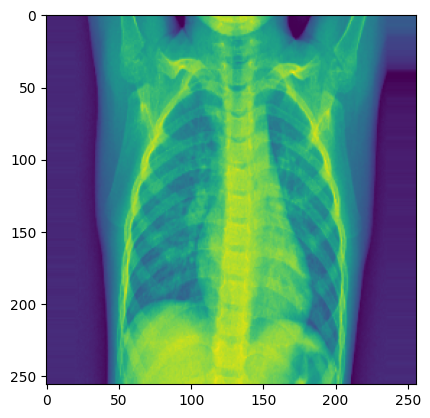

(256, 256, 1)
(32,)
(32, 256, 256, 1)


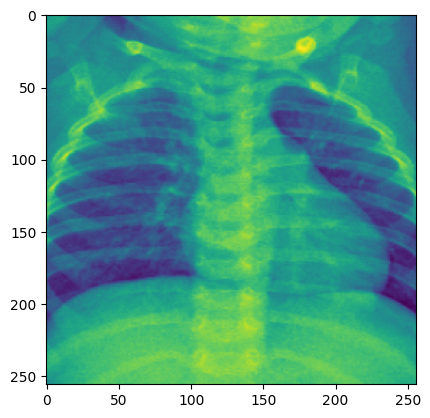

In [28]:
class_names = train_data.classes
print(class_names)
for image_batch, labels_batch in train_data:
    plt.imshow(image_batch[0])
    plt.show()
    print(image_batch[0].shape)
    print(labels_batch.shape)
    break
plt.clf()
print(image_batch.shape)
plt.imshow(image_batch[3])
plt.show()

##Q2: CNN Classifier (4 Pts)
In Q3 and Q4, we aim to use post-hoc explainability methods for visualizing the parts of the image that are important for the prediction of a model. Thus, design a small CNN classifier for the dataset and report its performance on a test set. Make sure to elaborate on your architecture and training details.

In [29]:
import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling

In [30]:
with tf.device(device_name):
    model = Sequential()
    model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(256, 256, 1)))
    model.add(MaxPooling2D())

    model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 1)))
    model.add(MaxPooling2D())

    model.add(Conv2D(32, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())

    model.add(Conv2D(32, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy', 'AUC'])

In [31]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight


early = EarlyStopping(monitor = 'val_loss', mode='min', patience=4)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [early, learning_rate_reduction]

unique_classes = np.unique(train_data.classes)
classes = train_data.classes

weights = compute_class_weight(class_weight = 'balanced', classes= unique_classes, y = classes)

class_weights = dict(zip( np.unique(train_data.classes), weights))


In [32]:
train =False

if train ==True:
  hist = model.fit(train_data, epochs=20, validation_data = val_data, class_weight = class_weights, callbacks=callbacks_list)
  model.save('my_model.h5')

In [33]:
model = tf.keras.models.load_model('/content/MLHC/my_model.h5')

In [34]:
results = model.evaluate(test_data, batch_size=32)

20/20 [==============================] - 17s 746ms/step - loss: 1.1291 - accuracy: 0.7067 - auc: 0.7347


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

##Q3: Integrated Gradients (4 Pts)
Like MLPs, CNNs perform very well in tasks like classification but lack interpretability due to their black-box nature. Again, post-hoc explainability methods are thus suitable alternatives. One class of post-hoc procedures specific to image data are methods generating attribution maps, which try to highlight the most important regions on which the CNN bases its predictions. For this part of the assignment, implement the integrated gradient method. Visualize attribution maps of five healthy and five disease test samples. Do the maps highlight sensible regions? Are attributions consistent across samples? Do they match potential observations from Q1?

We used keras Integrated Gradients to compute the Integrated Gradients

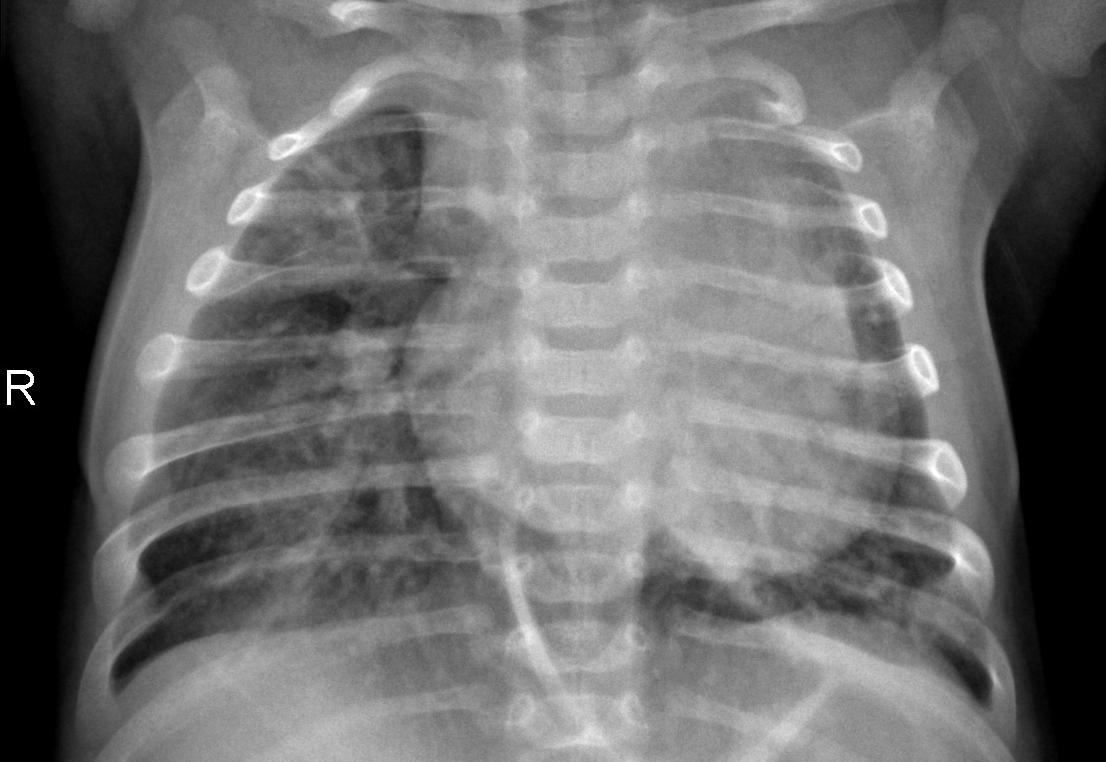

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from IPython.display import Image
from PIL import Image as Imagetry

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import xception


# Size of the input image
img_size = (256, 256, 1)
#model = new_model
# The local path to our target image
img_path = "/content/MLHC/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg"
display(Image(img_path))


In [37]:
'''
CLASS_INDEX = None
@keras_modules_injection
def test_my_decode_predictions(*args, **kwargs):
    return my_decode_predictions(*args, **kwargs)


def my_decode_predictions(preds, top=5, **kwargs):
    global CLASS_INDEX

    backend, _, _, keras_utils = get_submodules_from_kwargs(kwargs)

    # if len(preds.shape) != 2 or preds.shape[1] != 1000:
    #     raise ValueError('`decode_predictions` expects '
    #                      'a batch of predictions '
    #                      '(i.e. a 2D array of shape (samples, 1000)). '
    #                      'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = keras_utils.get_file(
            'imagenet_class_index.json',
            CLASS_INDEX_PATH,
            cache_subdir='models',
            file_hash='c2c37ea517e94d9795004a39431a14cb')
        with open(fpath) as f:
            CLASS_INDEX = json.load(f)
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results
'''

"\nCLASS_INDEX = None\n@keras_modules_injection\ndef test_my_decode_predictions(*args, **kwargs):\n    return my_decode_predictions(*args, **kwargs)\n\n\ndef my_decode_predictions(preds, top=5, **kwargs):\n    global CLASS_INDEX\n\n    backend, _, _, keras_utils = get_submodules_from_kwargs(kwargs)\n\n    # if len(preds.shape) != 2 or preds.shape[1] != 1000:\n    #     raise ValueError('`decode_predictions` expects '\n    #                      'a batch of predictions '\n    #                      '(i.e. a 2D array of shape (samples, 1000)). '\n    #                      'Found array with shape: ' + str(preds.shape))\n    if CLASS_INDEX is None:\n        fpath = keras_utils.get_file(\n            'imagenet_class_index.json',\n            CLASS_INDEX_PATH,\n            cache_subdir='models',\n            file_hash='c2c37ea517e94d9795004a39431a14cb')\n        with open(fpath) as f:\n            CLASS_INDEX = json.load(f)\n    results = []\n    for pred in preds:\n        top_indices = pr

In [38]:
def get_img_array(img_path, size=(256, 256)):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size, grayscale=True)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    images = tf.cast(img_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        top_class = preds[:, top_pred_idx]

    grads = tape.gradient(top_class, images)
    return grads


def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_size).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # 2. Preprocess the interpolated images
    #interpolated_image = xception.preprocess_input(interpolated_image)
    interpolated_image = interpolated_image/255

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * avg_grads
    return integrated_grads


def random_baseline_integrated_gradients(
    img_input, top_pred_idx, num_steps=50, num_runs=2
):
    """Generates a number of random baseline images.

    Args:
        img_input (ndarray): 3D image
        top_pred_idx: Predicted label for the input image
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.
        num_runs: number of baseline images to generate

    Returns:
        Averaged integrated gradients for `num_runs` baseline images
    """
    # 1. List to keep track of Integrated Gradients (IG) for all the images
    integrated_grads = []

    # 2. Get the integrated gradients for all the baselines
    for run in range(num_runs):
        baseline = np.random.random(img_size) * 255
        igrads = get_integrated_gradients(
            img_input=img_input,
            top_pred_idx=top_pred_idx,
            baseline=baseline,
            num_steps=num_steps,
        )
        integrated_grads.append(igrads)

    # 3. Return the average integrated gradients for the image
    integrated_grads = tf.convert_to_tensor(integrated_grads)
    return tf.reduce_mean(integrated_grads, axis=0)


In [39]:
class GradVisualizer:
    """Plot gradients of the outputs w.r.t an input image."""

    def __init__(self, positive_channel=None, negative_channel=None):
        if positive_channel is None:
            self.positive_channel = [0, 255, 0]
        else:
            self.positive_channel = positive_channel

        if negative_channel is None:
            self.negative_channel = [255, 0, 0]
        else:
            self.negative_channel = negative_channel

    def apply_polarity(self, attributions, polarity):
        if polarity == "positive":
            return np.clip(attributions, 0, 1)
        else:
            return np.clip(attributions, -1, 0)

    def apply_linear_transformation(
        self,
        attributions,
        clip_above_percentile=99.9,
        clip_below_percentile=70.0,
        lower_end=0.2,
    ):
        # 1. Get the thresholds
        m = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_above_percentile
        )
        e = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_below_percentile
        )

        # 2. Transform the attributions by a linear function f(x) = a*x + b such that
        # f(m) = 1.0 and f(e) = lower_end
        transformed_attributions = (1 - lower_end) * (np.abs(attributions) - e) / (
            m - e
        ) + lower_end

        # 3. Make sure that the sign of transformed attributions is the same as original attributions
        transformed_attributions *= np.sign(attributions)

        # 4. Only keep values that are bigger than the lower_end
        transformed_attributions *= transformed_attributions >= lower_end

        # 5. Clip values and return
        transformed_attributions = np.clip(transformed_attributions, 0.0, 1.0)
        return transformed_attributions

    def get_thresholded_attributions(self, attributions, percentage):
        if percentage == 100.0:
            return np.min(attributions)

        # 1. Flatten the attributions
        flatten_attr = attributions.flatten()

        # 2. Get the sum of the attributions
        total = np.sum(flatten_attr)

        # 3. Sort the attributions from largest to smallest.
        sorted_attributions = np.sort(np.abs(flatten_attr))[::-1]

        # 4. Calculate the percentage of the total sum that each attribution
        # and the values about it contribute.
        cum_sum = 100.0 * np.cumsum(sorted_attributions) / total

        # 5. Threshold the attributions by the percentage
        indices_to_consider = np.where(cum_sum >= percentage)[0][0]

        # 6. Select the desired attributions and return
        attributions = sorted_attributions[indices_to_consider]
        return attributions

    def binarize(self, attributions, threshold=0.001):
        return attributions > threshold

    def morphological_cleanup_fn(self, attributions, structure=np.ones((4, 4))):
        closed = ndimage.grey_closing(attributions, structure=structure)
        opened = ndimage.grey_opening(closed, structure=structure)
        return opened

    def draw_outlines(
        self, attributions, percentage=90, connected_component_structure=np.ones((3, 3))
    ):
        # 1. Binarize the attributions.
        attributions = self.binarize(attributions)

        # 2. Fill the gaps
        attributions = ndimage.binary_fill_holes(attributions)

        # 3. Compute connected components
        connected_components, num_comp = ndimage.measurements.label(
            attributions, structure=connected_component_structure
        )

        # 4. Sum up the attributions for each component
        total = np.sum(attributions[connected_components > 0])
        component_sums = []
        for comp in range(1, num_comp + 1):
            mask = connected_components == comp
            component_sum = np.sum(attributions[mask])
            component_sums.append((component_sum, mask))

        # 5. Compute the percentage of top components to keep
        sorted_sums_and_masks = sorted(component_sums, key=lambda x: x[0], reverse=True)
        sorted_sums = list(zip(*sorted_sums_and_masks))[0]
        cumulative_sorted_sums = np.cumsum(sorted_sums)
        cutoff_threshold = percentage * total / 100
        cutoff_idx = np.where(cumulative_sorted_sums >= cutoff_threshold)[0][0]
        if cutoff_idx > 2:
            cutoff_idx = 2

        # 6. Set the values for the kept components
        border_mask = np.zeros_like(attributions)
        for i in range(cutoff_idx + 1):
            border_mask[sorted_sums_and_masks[i][1]] = 1

        # 7. Make the mask hollow and show only the border
        eroded_mask = ndimage.binary_erosion(border_mask, iterations=1)
        border_mask[eroded_mask] = 0

        # 8. Return the outlined mask
        return border_mask

    def process_grads(
        self,
        image,
        attributions,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
    ):
        if polarity not in ["positive", "negative"]:
            raise ValueError(
                f""" Allowed polarity values: 'positive' or 'negative'
                                    but provided {polarity}"""
            )
        if clip_above_percentile < 0 or clip_above_percentile > 100:
            raise ValueError("clip_above_percentile must be in [0, 100]")

        if clip_below_percentile < 0 or clip_below_percentile > 100:
            raise ValueError("clip_below_percentile must be in [0, 100]")

        # 1. Apply polarity
        if polarity == "positive":
            attributions = self.apply_polarity(attributions, polarity=polarity)
            channel = self.positive_channel
        else:
            attributions = self.apply_polarity(attributions, polarity=polarity)
            attributions = np.abs(attributions)
            channel = self.negative_channel

        # 2. Take average over the channels
        attributions = np.average(attributions, axis=2)

        # 3. Apply linear transformation to the attributions
        attributions = self.apply_linear_transformation(
            attributions,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            lower_end=0.0,
        )

        # 4. Cleanup
        if morphological_cleanup:
            attributions = self.morphological_cleanup_fn(
                attributions, structure=structure
            )
        # 5. Draw the outlines
        if outlines:
            attributions = self.draw_outlines(
                attributions, percentage=outlines_component_percentage
            )

        # 6. Expand the channel axis and convert to RGB
        attributions = np.expand_dims(attributions, 2) * channel

        # 7.Superimpose on the original image
        if overlay:
            attributions = np.clip((attributions * 0.8 + image), 0, 255)
        return attributions

    def visualize(
        self,
        image,
        gradients,
        integrated_gradients,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
        figsize=(15, 8),
    ):
        # 1. Make two copies of the original image
        img1 = np.copy(image)
        img2 = np.copy(image)

        # 2. Process the normal gradients
        grads_attr = self.process_grads(
            image=img1,
            attributions=gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        # 3. Process the integrated gradients
        igrads_attr = self.process_grads(
            image=img2,
            attributions=integrated_gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        _, ax = plt.subplots(1, 3, figsize=figsize)
        ax[0].imshow(image)
        ax[1].imshow(grads_attr.astype(np.uint8))
        ax[2].imshow(igrads_attr.astype(np.uint8))

        ax[0].set_title("Input")
        ax[1].set_title("Normal gradients")
        ax[2].set_title("Integrated gradients")
        plt.show()


/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 230ms/step


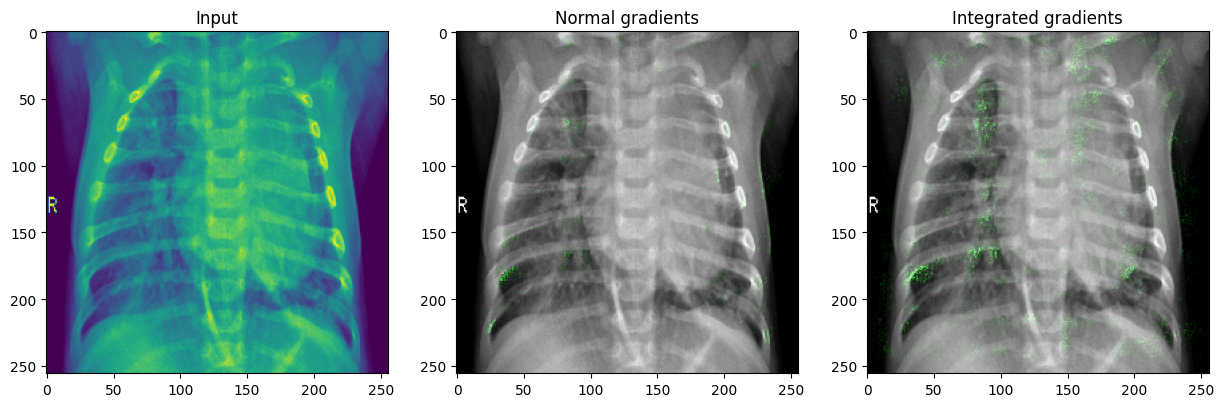

<ipython-input-39-154862ca35f0>:94: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  connected_components, num_comp = ndimage.measurements.label(


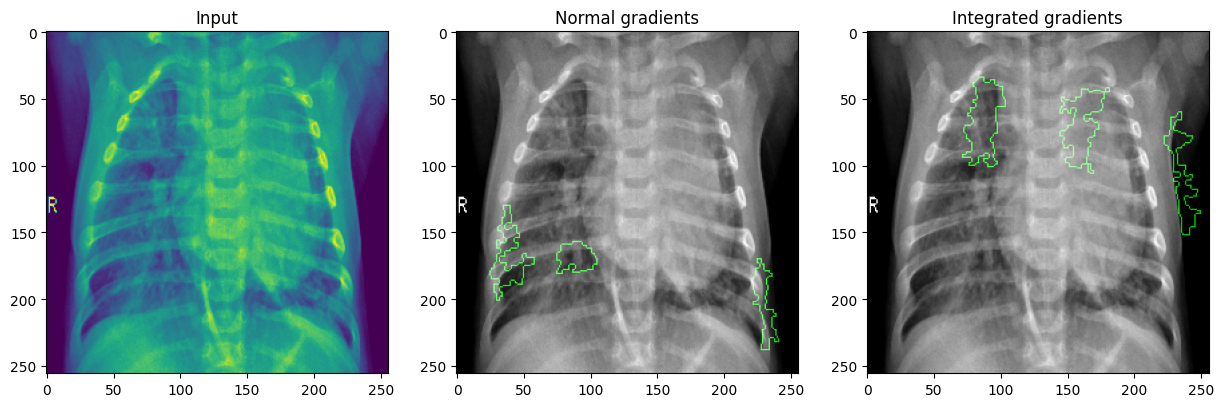

In [40]:

  # 1. Convert the image to numpy array
  img = get_img_array(img_path)
  # 2. Keep a copy of the original image
  orig_img = np.copy(img[0]).astype(np.uint8)
  # 3. Preprocess the image
  img_processed = tf.convert_to_tensor(orig_img, dtype=tf.float32)
  img_processed = tf.expand_dims(img_processed,0)
  # 4. Get model predictions
  preds = model.predict(img_processed)
  top_pred_idx = tf.argmax(preds[0])
  #print("Predicted:", top_pred_idx, xception.decode_predictions(preds, top=1)[0])
  # 5. Get the gradients of the last layer for the predicted label
  grads = get_gradients(img_processed, top_pred_idx=top_pred_idx)

  # 6. Get the integrated gradients
  igrads = random_baseline_integrated_gradients(
      np.copy(orig_img), top_pred_idx=top_pred_idx, num_steps=50, num_runs=2
  )

  # 7. Process the gradients and plot
  vis = GradVisualizer()
  vis.visualize(
      image=orig_img,
      gradients=grads[0].numpy(),
      integrated_gradients=igrads.numpy(),
      clip_above_percentile=99,
      clip_below_percentile=0,
  )

  vis.visualize(
      image=orig_img,
      gradients=grads[0].numpy(),
      integrated_gradients=igrads.numpy(),
      clip_above_percentile=95,
      clip_below_percentile=28,
      morphological_cleanup=True,
      outlines=True,
  )


##Q4: Grad-CAM6 (5 Pts)
Grad-CAM is another post-hoc method that generates attribution maps. Like in Q3, implement the method and visualize attribution maps of five healthy and five disease test samples. Do the maps highlight sensible regions? Are attributions consistent across samples? Compare your findings with Q3.